In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import datetime
import os
import matplotlib.pyplot as plt
import cx_Oracle
os.chdir("E:\oracle_python\instantclient\instantclient_18_3")
connection = cx_Oracle.connect("rptusr", "Rptusr#1608", "10.9.48.13:1555/rptdb")

In [ ]:
# bounce_data=pd.read_csv("D:/HE_Bounce_prediction/Bounce_input.csv")
bounce_data=pd.read_csv("D:/HE_Bounce_prediction/HE Bounce - Apr16 to Jun19/Bounce_input.csv")

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
# cust=bounce_data.dropna(thresh=2) 

In [ ]:
# bounce= pd.read_csv("D:/HE_Bounce_prediction/new/bounce_data.csv")

In [ ]:
bounce_data.head()

In [ ]:
# bounce_data.describe()

In [ ]:
# for column in ['race', 'goal', 'date', 'go_out', 'career_c']:
#     df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
Ac=bounce_data[bounce_data['STATUS'] <= 'A']

In [ ]:
Ac['QUALIFICATION']=np.where((Ac['QUALIFICATION'] =='GRAD') | (Ac['QUALIFICATION'] =='ENG') | (Ac['QUALIFICATION'] =='CSE'), 'UG', Ac['QUALIFICATION'])
Ac['QUALIFICATION']=np.where(Ac['QUALIFICATION'] =='DOC', 'DOCTRATE', Ac['QUALIFICATION'])

In [ ]:
Ac['MARITAL_STATUS'] = Ac['MARITAL_STATUS'].fillna(Ac['MARITAL_STATUS'].mode()[0])
Ac['AGE'] = Ac['AGE'].fillna(Ac['AGE'].mode()[0])
Ac['SEX'] = Ac['SEX'].fillna(Ac['SEX'].mode()[0])
Ac['QUALIFICATION'] = Ac['QUALIFICATION'].fillna(Ac['QUALIFICATION'].mode()[0])
Ac['CIBILTUSC2_SCORE'] = Ac['CIBILTUSC2_SCORE'].fillna(Ac['CIBILTUSC2_SCORE'].mean())

In [ ]:
# cust = pd.read_sql("select ag.agreementno, ag.proposalid, ag.status, ag.productflag, cu.* from finlen.lea_agreement_dtl ag join finlen.nbfc_customer_m cu on cu.customerid=ag.lesseeid where ag.productflag='HE'",con=connection)

In [ ]:
# Ac.select_dtypes(include=['object']).copy()

In [ ]:
cat_df_flights = Ac

In [ ]:
var1=Ac.iloc[:, 0:14] 

In [ ]:
var1.head()

In [ ]:
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
cat_df_flights.drop(cat_df_flights.columns[cols],axis=1,inplace=True)

In [ ]:
cat_df_flights.head()

In [ ]:
cat_df_flights['class'] = cat_df_flights.max(axis=1)

In [ ]:
# print(cat_df_flights.isnull().values.sum())

In [ ]:
# print(Ac.select_dtypes(include=['object']).copy())

In [ ]:
# print(Ac.isnull().sum())

In [ ]:
# Ac['MARITAL_STATUS']=Ac['MARITAL_STATUS'].fillna(Ac['MARITAL_STATUS'].value_counts().index[0])

In [ ]:
# train['class'].value_counts().index[0]

In [ ]:
print(train['class'].value_counts())

In [ ]:
# print(Ac['QUALIFICATION'].value_counts().count())

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
MARITAL_STATUS_count = Ac['QUALIFICATION'].value_counts()
sns.set(style="darkgrid")
sns.barplot(MARITAL_STATUS_count.index, MARITAL_STATUS_count.values, alpha=0.9)
plt.title('Frequency Distribution of MARITAL_STATUS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('MARITAL_STATUS', fontsize=12)
plt.show()


In [ ]:
labels = Ac['QUALIFICATION'].astype('category').cat.categories.tolist()
counts = Ac['QUALIFICATION'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [ ]:
df4=pd.concat([var1, cat_df_flights['class']], axis=1)

In [ ]:
df4.head()

In [ ]:
# cust=cust.dropna(subset=['AGREEMENTNO']) 


In [ ]:
# cibil= pd.read_sql("select * from HE_SEC_CIBIL_JUN19",con=connection)

In [ ]:
# HE_cust = cust[['AGREEMENTNO','PROPOSALID','STATUS','PRODUCTFLAG','CUSTOMERID','CUSTOMERNAME','CONSTID','AGE','INDV_CORP_FLAG','CUST_RATING','BRANCHID','FNAME','DOB','SEX','MARITAL_STATUS','QUALIFICATION','INCOME_SOURCE','PROFESSIONCODE','TITLE','MC_STATUS','MAKERID','MAKERDATE','AUTHID','AUTHDATE','ACCOTYPE','ACCOCATG','CIF_NO','DATELASTUPDT','CREDIT_FLAG','MINOR','MAS_CODE','CHOLA_GROUPID','UCIC']]

In [ ]:
train['class'].value_counts().count()

In [ ]:
# Ac.BANKNAME.value_counts().count()

In [ ]:
# df4.ACCOTYPE.unique()

In [ ]:
df4.head()

In [ ]:
cat_vars=['MARITAL_STATUS','SEX','QUALIFICATION','ACCOTYPE','AGREEMENTNO','BANKNAME','STATUS']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df4[var], prefix=var)
    data1=df4.join(cat_list)
    data=data1
cat_vars=['MARITAL_STATUS','SEX','QUALIFICATION','ACCOTYPE','AGREEMENTNO','BANKNAME','STATUS']
data_vars=df4.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=data[to_keep]
data_final.columns.values

In [ ]:
 HE_cust = df4[['AGE','AMTFIN','EFFRATE','LOWESTTECHVALUE','class']]

In [ ]:
train.head()

In [3]:
df4=pd.read_csv("D:/HE_Bounce_prediction/HE Bounce - Apr16 to Jun19/iee_data.csv")
# df4.to_csv("D:/HE_Bounce_prediction/HE Bounce - Apr16 to Jun19/iee_data.csv")

In [13]:
 print(df4.isnull().sum())

TENURE              0
EMI                 0
AGE                 0
MARITAL_STATUS      0
SEX                 0
QUALIFICATION       0
ASSETCOST           0
AMTFIN              0
EFFRATE             0
LOWESTTECHVALUE     0
HIGHESTTECHVALUE    0
CIBILTUSC2_SCORE    0
class               0
dtype: int64


In [ ]:
# df4['MARITAL_STATUS'] = df4['MARITAL_STATUS'].fillna(df4['MARITAL_STATUS'].mode()[0])
# df4['SEX'] = df4['SEX'].fillna(df4['SEX'].mode()[0])
# df4['QUALIFICATION'] = df4['QUALIFICATION'].fillna(df4['QUALIFICATION'].mode()[0])
# df4['CIBILTUSC2_SCORE'] = df4['CIBILTUSC2_SCORE'].fillna(df4['CIBILTUSC2_SCORE'].mean())
# df4['AGE'] = df4['AGE'].fillna(df4['AGE'].mode()[0])

In [4]:
SEX = pd.get_dummies(df4['SEX'],drop_first=True)
MARITAL_STATUS = pd.get_dummies(df4['MARITAL_STATUS'],drop_first=True)
QUALIFICATION =pd.get_dummies(df4['QUALIFICATION'],drop_first=True)
# ACCOTYPE =pd.get_dummies(df4['ACCOTYPE'],drop_first=True)

In [5]:
df4.drop(['AGREEMENTNO','BANKNAME','STATUS','ACCOTYPE'],axis=1,inplace=True)


In [ ]:
#  HE_cust = train1[['OTHERS','POSTGRAD','UG','AGE','AMTFIN','EFFRATE','LOWESTTECHVALUE','class']]

In [6]:
train = pd.concat([SEX,MARITAL_STATUS,QUALIFICATION,df4],axis=1)

In [7]:
train.drop(['SEX','MARITAL_STATUS','QUALIFICATION'],axis=1,inplace=True)


In [30]:
train1.head()

,M,S,OTHERS,POSTGRAD,UG,TENURE,EMI,AGE,ASSETCOST,AMTFIN,EFFRATE,LOWESTTECHVALUE,HIGHESTTECHVALUE,CIBILTUSC2_SCORE,class
0,1,0,0,0,1,180,19,56,6800000,6800000,11.0,11400000,16483500,758.0,0
1,1,0,0,0,1,180,1075,49,100000,100000,10.0,45700000,46017250,734.0,0
2,1,0,0,0,1,180,1099,52,100000,100000,10.4,18894000,21839500,801.0,0
3,0,0,0,0,1,180,1105,50,100000,100000,10.5,5830000,6996000,689.0,1
4,0,0,0,0,1,180,1105,50,100000,100000,10.5,5830000,6996000,689.0,0


In [10]:
# HE_cust = train[['M','S','OTHERS','EMI','TENURE','POSTGRAD','UG','AGE','AMTFIN','EFFRATE','LOWESTTECHVALUE','class']]
HE_cust = train[['EMI','TENURE','LOWESTTECHVALUE','class']]

In [ ]:
train1.info()

In [11]:
from sklearn import preprocessing
def convert(data):
    number = preprocessing.LabelEncoder()
    data['M'] = number.fit_transform(data.M)
    data['S'] = number.fit_transform(data.S)
    data['OTHERS'] = number.fit_transform(data.OTHERS)
    data['POSTGRAD'] = number.fit_transform(data.POSTGRAD)
    data['UG'] = number.fit_transform(data.UG)
    data=data.fillna(-999)
    return data

In [15]:
train1=convert(train)


In [33]:
train1.shape

(17600, 15)

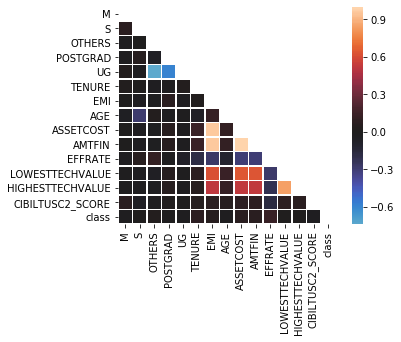

In [39]:
import seaborn as sns
corr_back = train.corr()
# Generate a mask for the upper right triangle of the square - one half is enough to convey the correlation 
## between the predictors
mask = np.zeros_like(corr_back, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate the correlation plot 
sns.heatmap(corr_back, mask=mask, center=0, square=True, linewidths=.5)

plt.show()

In [40]:
# Seeing the correlation values
corr_back

,M,S,OTHERS,POSTGRAD,UG,TENURE,EMI,AGE,ASSETCOST,AMTFIN,EFFRATE,LOWESTTECHVALUE,HIGHESTTECHVALUE,CIBILTUSC2_SCORE,class
M,1.000000,0.075785,-0.020229,-0.012151,0.030215,0.025325,-0.004242,-0.044380,-0.000307,-0.000257,-0.031567,-0.011344,-0.009311,0.065638,-0.012374
S,0.075785,1.000000,0.000270,0.049095,-0.032180,0.011332,-0.028237,-0.280528,-0.027001,-0.027133,0.057523,-0.026108,-0.023390,-0.052206,0.011630
OTHERS,-0.020229,0.000270,1.000000,-0.049071,-0.738974,-0.030146,-0.034654,0.032261,-0.037080,-0.037151,0.115549,-0.050482,-0.038443,-0.019899,0.029777
POSTGRAD,-0.012151,0.049095,-0.049071,1.000000,-0.583960,-0.018017,0.065897,-0.038518,0.057931,0.058328,-0.022553,0.049772,0.053748,0.015865,-0.007072
UG,0.030215,-0.032180,-0.738974,-0.583960,1.000000,0.034805,-0.031357,-0.005793,-0.024780,-0.025063,-0.068082,-0.006093,-0.015127,0.002676,-0.016085
TENURE,0.025325,0.011332,-0.030146,-0.018017,0.034805,1.000000,0.027275,-0.066395,0.133474,0.133445,-0.184064,0.079279,0.057643,0.043866,0.078611
EMI,-0.004242,-0.028237,-0.034654,0.065897,-0.031357,0.027275,1.000000,0.118037,0.960383,0.962239,-0.263581,0.618978,0.512627,0.075092,0.058316
AGE,-0.044380,-0.280528,0.032261,-0.038518,-0.005793,-0.066395,0.118037,1.000000,0.114390,0.114552,-0.101918,0.132187,0.117426,0.061067,-0.023399
ASSETCOST,-0.000307,-0.027001,-0.037080,0.057931,-0.024780,0.133474,0.960383,0.114390,1.000000,0.998507,-0.300454,0.640527,0.529810,0.079275,0.062794
AMTFIN,-0.000257,-0.027133,-0.037151,0.058328,-0.025063,0.133445,0.962239,0.114552,0.998507,1.000000,-0.300540,0.639513,0.529202,0.079435,0.063107


In [16]:
## Import library
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [35]:
y_test.shape

(5280,)

In [17]:
X = train1.iloc[:, 0:14].values
y = train1.iloc[:, 14].values
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LogisticRegression

In [18]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [19]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.676943
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.005     
Dependent Variable: y                AIC:              16707.8756
Date:               2019-08-19 14:01 BIC:              16811.7413
No. Observations:   12320            Log-Likelihood:   -8339.9   
Df Model:           13               LL-Null:          -8380.4   
Df Residuals:       12306            LLR p-value:      7.2515e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1     -0.0163      0.0184    -0.8819    0.3778    -0.0524    0.0199
x2      0.0118      0.0192     0.6136    0.5395    -0.

In [23]:
from sklearn import linear_model
Classifier = linear_model.LogisticRegression()
result=Classifier.fit(X_train, y_train)
# make predictions for test data
y_pred = Classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[2667  374]
 [1607  632]]
Accuracy: 62.48%


In [21]:
# fit model
from sklearn.ensemble import GradientBoostingClassifier
Classifier = GradientBoostingClassifier(n_estimators=100,max_depth=5)
Classifier.fit(X_train, y_train)
# make predictions for test data
y_pred = Classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

D:\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[2358  683]
 [1097 1142]]
Accuracy: 66.29%


In [24]:
# fit model
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors=3)
Classifier.fit(X_train, y_train)
# make predictions for test data
y_pred = Classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[2032 1009]
 [1263  976]]
Accuracy: 56.97%


In [25]:
# fit model
from sklearn import svm
Classifier = svm.LinearSVC(random_state=20)
Classifier.fit(X_train, y_train)
# make predictions for test data
y_pred = Classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[2680  361]
 [1615  624]]
Accuracy: 62.58%


In [26]:
# fit model
from sklearn.naive_bayes import GaussianNB
Classifier = GaussianNB()
Classifier.fit(X_train, y_train)
# make predictions for test data
y_pred = Classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[2663  378]
 [1839  400]]
Accuracy: 58.01%


In [27]:
# fit model
from sklearn.ensemble import RandomForestRegressor
Classifier = RandomForestRegressor(n_estimators=20, random_state=0)
Classifier.fit(X_train, y_train)
# make predictions for test data
y_pred = Classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[2285  756]
 [1214 1025]]
Accuracy: 62.69%


In [42]:
# fit model
from xgboost import XGBClassifier
Classifier = XGBClassifier()
Classifier.fit(X_train, y_train)
# make predictions for test data
y_pred = Classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy=accuracy_score(y_test,predictions)
cm = confusion_matrix(y_test, predictions)
print(cm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


[[2413  628]
 [1129 1110]]
Accuracy: 66.72%


D:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
from keras import Sequential
from keras.layers import Dense
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(14, activation='relu', kernel_initializer='random_normal', input_dim=14))
#Second  Hidden Layer
classifier.add(Dense(14, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
classifier.fit(X_train,y_train, batch_size=10,epochs=100)
# eval_model=classifier.evaluate(X_train, y_train)
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
12320/12320 [==============================] - 2s 197us/step - loss: 0.6676 - acc: 0.5948
Epoch 2/100
12320/12320 [==============================] - 2s 170us/step - loss: 0.6599 - acc: 0.6126
Epoch 3/100
12320/12320 [==============================] - 2s 171us/step - loss: 0.6589 - acc: 0.6139
Epoch 4/100
12320/12320 [==============================] - 2s 145us/step - loss: 0.6579 - acc: 0.6147
Epoch 5/100
12320/12320 [==============================] - 2s 142us/step - loss: 0.6574 - acc: 0.6144
Epoch 6/100
12320/12320 [==============================] - 2s 196us/step - loss: 0.6569 - acc: 0.6140
Epoch 7/100
12320/12320 [==============================] - 2s 167us/step - loss: 0.6563 - acc: 0.6188
Epoch 8/100
12320/12320 [==============================] - 2s 152us/step - loss: 0.6553 - acc: 0.6183
Epoch 9/100
12320/12320 [==============================] - 2s 161us/step - loss: 0.6549 - acc: 0.6204
Epoch 10/100
12320/12320 [========

12320/12320 [==============================] - 2s 164us/step - loss: 0.6379 - acc: 0.6406
Epoch 79/100
12320/12320 [==============================] - 2s 166us/step - loss: 0.6382 - acc: 0.6399
Epoch 80/100
12320/12320 [==============================] - 2s 165us/step - loss: 0.6381 - acc: 0.6415
Epoch 81/100
12320/12320 [==============================] - ETA: 0s - loss: 0.6386 - acc: 0.644 - 3s 210us/step - loss: 0.6385 - acc: 0.6442
Epoch 82/100
12320/12320 [==============================] - 2s 198us/step - loss: 0.6377 - acc: 0.6403
Epoch 83/100
12320/12320 [==============================] - 3s 236us/step - loss: 0.6384 - acc: 0.6413 2s -  - ETA: 0s - loss: 0.63
Epoch 84/100
12320/12320 [==============================] - 3s 207us/step - loss: 0.6370 - acc: 0.6455
Epoch 85/100
12320/12320 [==============================] - 2s 201us/step - loss: 0.6375 - acc: 0.6415
Epoch 86/100
12320/12320 [==============================] - 3s 262us/step - loss: 0.6373 - acc: 0.6420
Epoch 87/100
12320/

In [37]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

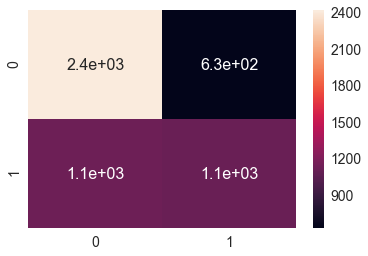

In [43]:
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [ ]:
updated_arrays = np.where(df['hh'] == 0, 1, df['hh']) 

In [ ]:
updated_arrays

In [ ]:
df['hh'] = pd.DataFrame(data=predictions)

In [ ]:
from sklearn.metrics import classification_report 
print('Accuracy Score :',accuracy_score(y_test, updated_arrays))
print('Report : ')
cm = confusion_matrix(y_test, updated_arrays)
print(cm)
print(classification_report(y_test, updated_arrays))